In [4]:
import sklearn
import pandas as pd
import numpy as np

In [5]:
rf_df = pd.read_csv('Final_Dataset_GNB.csv')
rf_df.head()

,RepeatStatus,Gender,MEMBER_RATING,Accepts Marketing,Discount_Percentage,Total,Installment,Source,PersonalizationDone,NumberItemsTotal,...,Bifold Wallets,Coin & Card Holders,Passport Wallets,Long Wallets,Luggage Tags,Lanyard,Bag Straps,Bracelets,Festive_purchase,Order_ID
0,0,F,5,yes,0.03,284.0,Cash,web,0,1,...,0,0,0,0,0,0,0,0,0,#5769
1,0,F,2,yes,0.21,141.1,Cash,pos,0,1,...,1,0,0,0,0,0,0,0,0,#5764
2,0,M,2,yes,0.00,79.0,Cash,pos,0,1,...,0,1,0,0,0,0,0,0,0,#5763
3,0,F,2,yes,0.06,92.0,Cash,pos,0,1,...,0,1,0,0,0,0,0,0,0,#5762
4,0,F,2,yes,0.27,159.0,Cash,pos,0,1,...,0,0,0,1,0,0,0,0,0,#5761


In [8]:
target = np.array(rf_df['RepeatStatus'])
variables = rf_df.drop(['RepeatStatus', 'Order_ID'], axis = 1)
variables = pd.get_dummies(variables)
variableList = list(variables.columns)
variables = np.array(variables)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_variables, test_variables, train_target, test_target = train_test_split(variables, target, test_size = 0.20, random_state = 42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_variables = sc.fit_transform(train_variables)
test_variables = sc.transform(test_variables)

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_variables, train_target)
# pred = rf.predict(test_variables)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [11]:
# Extract feature importances
fi = pd.DataFrame({'feature': variableList,
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi

,feature,importance
2,Total,0.379024
1,Discount_Percentage,0.146361
0,MEMBER_RATING,0.102137
19,Festive_purchase,0.037091
3,PersonalizationDone,0.033044
4,NumberItemsTotal,0.032458
11,Bifold Wallets,0.023900
12,Coin & Card Holders,0.022634
20,Gender_F,0.021962
21,Gender_M,0.021222


In [12]:
threshold = 0.1

predicted_proba = rf.predict_proba(test_variables)
pred = (predicted_proba [:,1] >= threshold).astype('int')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_target,pred))
print(classification_report(test_target,pred))
print(accuracy_score(test_target, pred))

[[293 328]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.62       621
           1       0.13      0.59      0.22        85

    accuracy                           0.49       706
   macro avg       0.51      0.53      0.42       706
weighted avg       0.80      0.49      0.57       706

0.48583569405099153


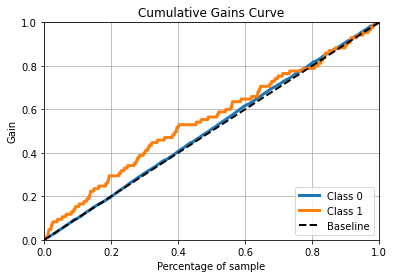

In [14]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(test_target, predicted_proba)
plt.show()